# Klasifikasi Diagnosa Data Medis Kanker Serviks dengan Machine Learning

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
import warnings

data = pd.read_csv('/content/drive/MyDrive/me/risk_factors_cervical_cancer.csv')

# Exploratory data analysis

As we can see in the display below, our dataset contains 36 columns and 858 rows. These columns don't have null values, but we have many columns of type object, we should change the type of these columns to an integer type, or at least the columns we are interested in. But first we are going to show some rows to know if the object type columns contains categorical values.

In [ ]:
# Show some important information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 858 non-null    int64 
 1   Number of sexual partners           858 non-null    object
 2   First sexual intercourse            858 non-null    object
 3   Num of pregnancies                  858 non-null    object
 4   Smokes                              858 non-null    object
 5   Smokes (years)                      858 non-null    object
 6   Smokes (packs/year)                 858 non-null    object
 7   Hormonal Contraceptives             858 non-null    object
 8   Hormonal Contraceptives (years)     858 non-null    object
 9   IUD                                 858 non-null    object
 10  IUD (years)                         858 non-null    object
 11  STDs                                858 non-null    object

In the table below we can see that all the columns contain numbers, this is a good news because we don't have to modify the table content, but we do have to modify the column type. The bad news are that we thought we had no null values, but we have the question mark character, and it is the sameas the null value although the system doesn't recognize this character as a null value. Let's replace this character to show how many null values actually have.

In [ ]:
pd.set_option('display.max_columns', None)
data[0:10]

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
2,34,1.0,?,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
5,42,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,1,1,0,1
7,26,1.0,26.0,3.0,0.0,0.0,0.0,1.0,2.0,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0
8,45,1.0,20.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,1,0,1,1,0,0,0,0
9,44,3.0,15.0,?,1.0,1.266972909,2.8,0.0,0.0,?,?,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,?,?,0,0,0,0,0,0,0,0


Now we can see the real null values we have in the whole dataset, but if we want to show it more clearly we can use a bar chart.

In [ ]:
for col in data.columns:
    data[col] = np.where(data[col] == '?', np.nan, data[col])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 858 non-null    float64
 1   Number of sexual partners           832 non-null    object 
 2   First sexual intercourse            851 non-null    object 
 3   Num of pregnancies                  802 non-null    object 
 4   Smokes                              845 non-null    object 
 5   Smokes (years)                      845 non-null    object 
 6   Smokes (packs/year)                 845 non-null    object 
 7   Hormonal Contraceptives             750 non-null    object 
 8   Hormonal Contraceptives (years)     750 non-null    object 
 9   IUD                                 741 non-null    object 
 10  IUD (years)                         741 non-null    object 
 11  STDs                                753 non-n

<BarContainer object of 36 artists>

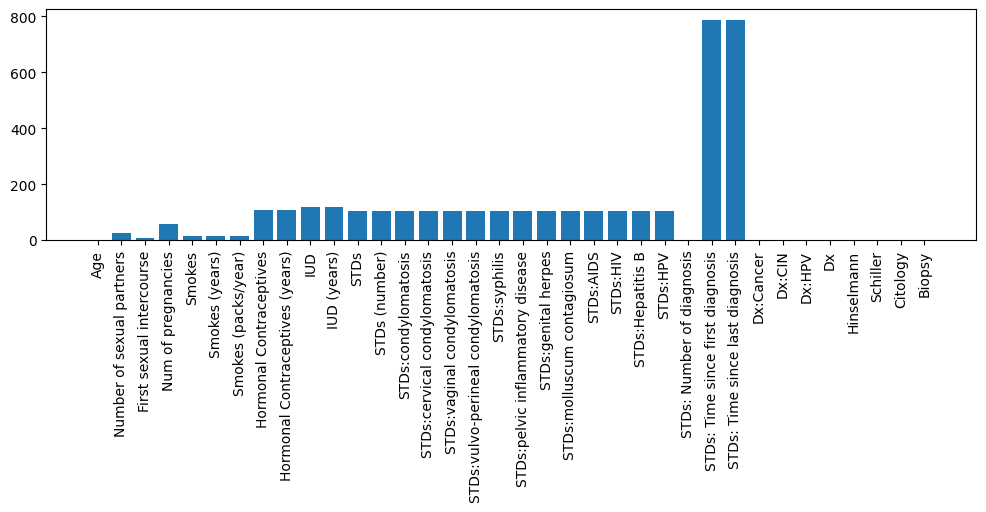

In [ ]:
import matplotlib.pyplot as plt
x = data.columns
y = data.isna().sum()
fig, ax = plt.subplots(figsize = (12, 3))
plt.xticks(rotation='vertical')
ax.bar(x,y)

We can see that the columns named 'STDs: Time since first diagnosis' and 'STDs: Time since last diagnosis' have many null values. There are other columns that contais null values but we can either replace them with zeros, or remove this rows to avoid variations in the standard deviation. Now, we will drop these two useless columns and drop the rows with null values.

In [ ]:
data = data.drop(columns = ['STDs: Time since first diagnosis', 'STDs: Time since last diagnosis' ])
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 668 non-null    float64
 1   Number of sexual partners           668 non-null    object 
 2   First sexual intercourse            668 non-null    object 
 3   Num of pregnancies                  668 non-null    object 
 4   Smokes                              668 non-null    object 
 5   Smokes (years)                      668 non-null    object 
 6   Smokes (packs/year)                 668 non-null    object 
 7   Hormonal Contraceptives             668 non-null    object 
 8   Hormonal Contraceptives (years)     668 non-null    object 
 9   IUD                                 668 non-null    object 
 10  IUD (years)                         668 non-null    object 
 11  STDs                                668 non-n

Now we have the dataset without null values because we have removed these rows. The next step is modify the column types.

In [ ]:
data = data.astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 857
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 668 non-null    float64
 1   Number of sexual partners           668 non-null    float64
 2   First sexual intercourse            668 non-null    float64
 3   Num of pregnancies                  668 non-null    float64
 4   Smokes                              668 non-null    float64
 5   Smokes (years)                      668 non-null    float64
 6   Smokes (packs/year)                 668 non-null    float64
 7   Hormonal Contraceptives             668 non-null    float64
 8   Hormonal Contraceptives (years)     668 non-null    float64
 9   IUD                                 668 non-null    float64
 10  IUD (years)                         668 non-null    float64
 11  STDs                                668 non-n

Now the columns don't contain null values and all are of numerical type, the next step is to obtain more information showing the statistical analisis.

In [ ]:
data.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.0,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.0,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000,668.000000
mean,27.264970,2.523952,17.142216,2.323353,0.143713,1.235524,0.458953,0.643713,2.290037,0.112275,0.530030,0.097305,0.166168,0.055389,0.0,0.005988,0.053892,0.022455,0.001497,0.001497,0.001497,0.0,0.019461,0.001497,0.002994,0.092814,0.025449,0.004491,0.023952,0.023952,0.044910,0.094311,0.058383,0.067365
std,8.727432,1.640299,2.852046,1.465319,0.351061,4.193611,2.336308,0.479260,3.724400,0.315942,2.001308,0.296595,0.551073,0.228910,0.0,0.077208,0.225974,0.148269,0.038691,0.038691,0.038691,0.0,0.138242,0.038691,0.054677,0.310355,0.157603,0.066915,0.153015,0.153015,0.207262,0.292480,0.234642,0.250841
min,13.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,84.000000,28.000000,32.000000,11.000000,1.000000,37.000000,37.000000,1.000000,22.000000,1.000000,19.000000,1.000000,4.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


The above table contains a lot of valuable data, what I can see is:
- The maximum value in the 'Age' column is 84, but in the other columns the maximum value is much lower than in the 'Age' column, this could lead us to a bad performance of our model, because the 'Age' column would have more influence than the other columns. The solution is to standarize the values of all columns to avoid the difference of influence when training the model.

- The maximum value in the 'Num of pregnancies' is 11, this is a very high number of pregnancies, so this could be an outlier that alters all the other values in this column. The solution could be to delete these rows but we will do this if we have a bad performance.

- The columns 'STDs:cervical condylomatosis', and 'STDs:AIDS' only contains zeros, therefore are useless columns. The solution is to delete them.

- The 'Dx:Cancer' column (This will be our dependent variable or variable to predict) is very unbalanced, because the mean is 0.0255. If the class were well balanced the mean would be close to 0.5. We wil show this with a plot for a better understanding. Solving this problem is very difficult, the best solution would be to get more possitve data to train our model but in our case this is not possible, another solution could be to remove some negative cases to balance them with the positive cases but we are losing a lot of information. For now we can't do anything, and we have to work with this data.

In [ ]:
#Delete useless columns
data = data.drop(columns = ['STDs:cervical condylomatosis', 'STDs:AIDS'])

Before standardizing our data we must know if we have columns that provide us the same (or very similar) information, which could lead our model to a bad performance. We can know this information drawing a correlation matrix.

<Axes: >

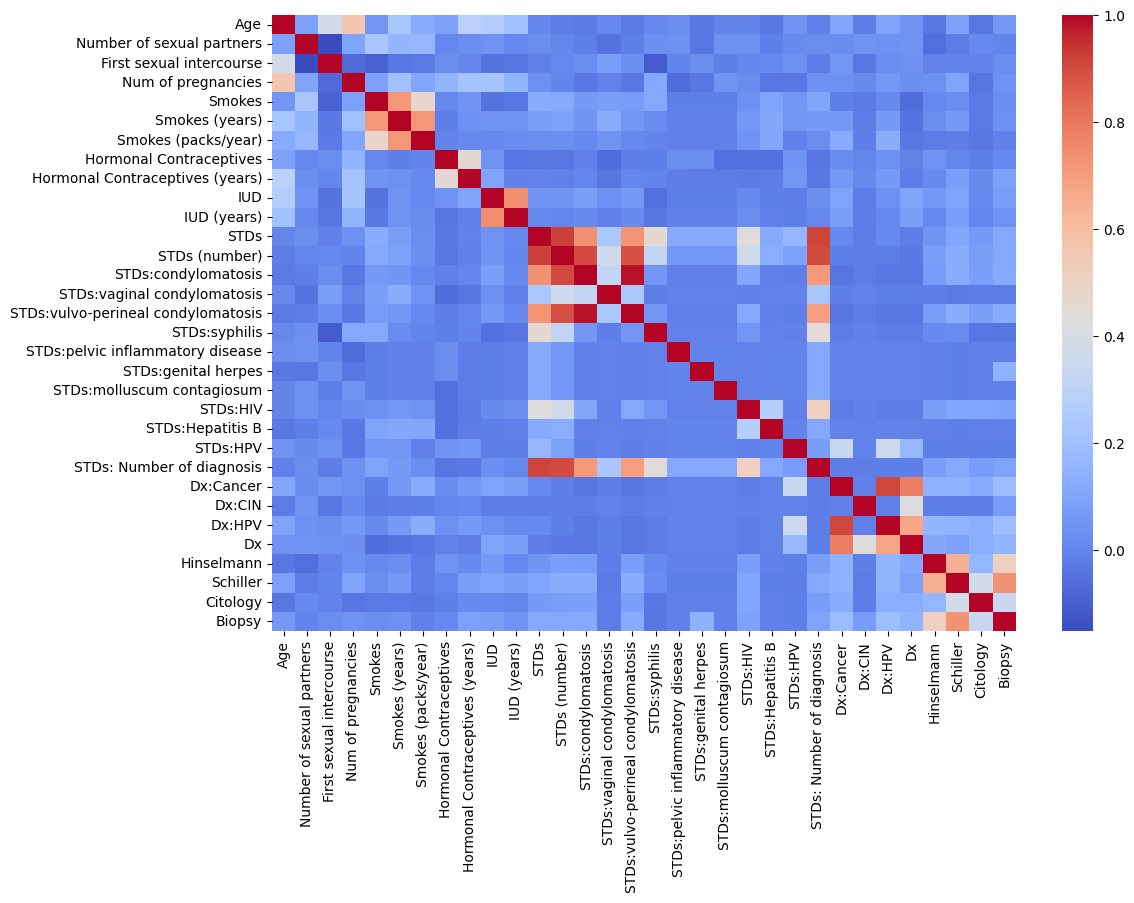

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),cmap='coolwarm')

Perhaps the above correlation matrix it's tough to interpret, but we can extract some information.
- We can see that 'STDs' column is very correlated with 'STDs (number)', 'STDs: Number of diagnosis'.
- Also we can see that 'STDs:vulvo-perineal condylomatosis' is highly correlated with 'STDs:condylomatosis'

The solution could be to remove the 'STDs' column and the 'STD:condylomatosis' columns, but if we remove them the model might perform poorly because we have less information. For this reason we will drop these two columns but we still keep them in another dataframe, and when we train the model we train two different models with our two different datasets and do the comparison.

<Axes: >

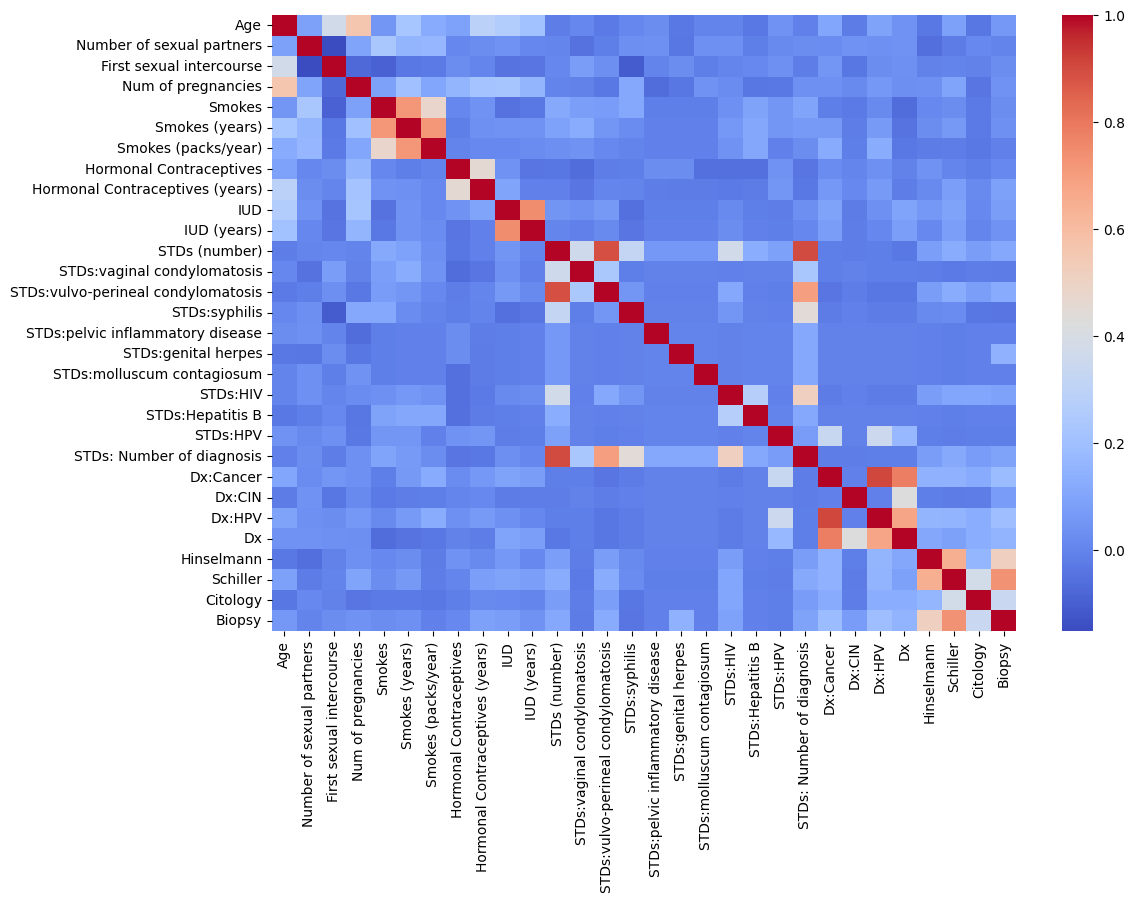

In [ ]:
data2 = data.drop(columns = ['STDs', 'STDs:condylomatosis'])
plt.figure(figsize=(12,8))
sns.heatmap(data2.corr(),cmap='coolwarm')

As we see in the last correlation matrix, now we don't have columns that tells us the same information, maybe we can have very similar columns but is not a problem.

Another useful thing to know is whether or not we have duplicated values. Duplicated values could lead our model to a poor performance becuase could have bias towards duplicated cases, for this reason we should know if we have duplicated values and if do, eliminate these rows.

In [ ]:
data.duplicated().sum()

18

As we can see, we have 18 duplicate values, we should drop them.

In [ ]:
data = data.drop_duplicates()
data.duplicated().sum()

0

Now let's to show the number of positive and negative classes we have in the 'Dx:Cancer' columns

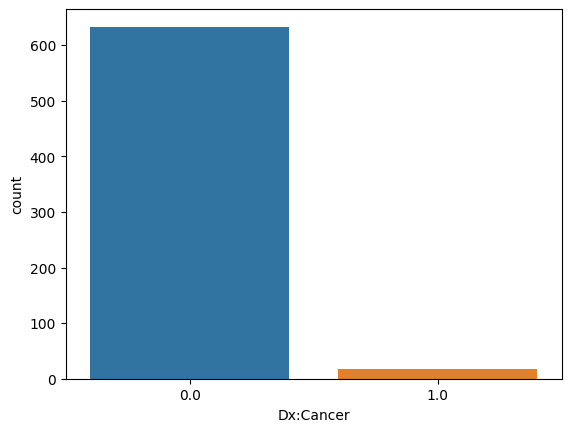

In [ ]:
sns.countplot(x='Dx:Cancer',data=data);

As we can see in in the display above, and as we can imagine, we are dealing with a very unbalanced dataset. We have more than 600 classes belonging to the negative class, and about 25 classes belonging to the positive class. This could be a problem when training the model.

For now we have do it:
- Removed null values.
- Modified the column types.
- Removed useless columns.
- Removed duplicates
- Showed the balancing of the data

But before training our model we should:
- Select dependent and independent variables.
- Standardize the data.
- Split out data between training and testing


# Pre-training steps.

We will execute some pre-training steps that are necessary to apply the algorithms to our data, and we will do it first on the dataframe that not contains the  'STDs' column and the 'STD:condylomatosis' columns, or the same, with 'data2' dataframe

In [ ]:
#Select dependent and independent variables.
cols = data2.columns
x = data2.iloc[:, cols != 'Dx:Cancer'].values #Select all columns but 'Dx:Cancer' (Independent variables)
y = data2[['Dx:Cancer']].values #Variable that we want to predict (Dependent variable)

In [ ]:
#Standarize the values.
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x = std.fit_transform(x)

In [ ]:
#Split our data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

Now that the pre-train steps are done, let's to train our model with some algorithms.

# Training phase.

It's time to train our model, but for this we have to choose the algorithm that works best in our dataset. It's impossible to know which algorithm will work best on our model but we can select some algorithms that a priori work well.

In [ ]:
from sklearn import svm
svc = svm.SVC()
svc.fit(x_train, y_train)
print("Accuracy test SVC: {:.3f}".format(svc.score(x_test, y_test)))
print("Accuracy train SVC: {:.3f}".format(svc.score(x_train, y_train)))

from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train, y_train)
print("Accuracy test SGDClassifier: {:.3f}".format(sgd.score(x_test, y_test)))
print("Accuracy train SGDClassifier: {:.3f}".format(sgd.score(x_train, y_train)))

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
print("Accuracy test DTC: {:.3f}".format(dtc.score(x_test, y_test)))
print("Accuracy train DTC: {:.3f}".format(dtc.score(x_train, y_train)))

Accuracy test SVC: 0.994
Accuracy train SVC: 1.000
Accuracy test SGDClassifier: 0.994
Accuracy train SGDClassifier: 1.000
Accuracy test DTC: 1.000
Accuracy train DTC: 1.000


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


As we can see in the above display, our model fits perfectly and if we deploy this model to predict cervical cancer we would have an accuracy of 100%. But the accuracy metric could mislead us, because the accuracy doesn't works well when we have unbalanced classes, the reason is that if our data contains the 94% of positive cases (for example) and the other 6% are negative cases, we can reach an accuracy of 98% and think that our model is almost perfect, but in reality the model could be very good model predicting only positive cases because have many examples, but can be very bad at predicting negative cases because we have a few examples. Accuracy is a good indicator when the classes are balanced, but not in our case. So let's evaluate our model with other and more useful metrics.

# Evaluation metrics
The accuracy is a good indicator to know well our model performs, but not for imbalanced clases, for this reason we will use another evaluations metrics that fits better on our dataset. The first metric to use is the confusion matrix.

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = dtc.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[163,   0],
       [  0,   4]])

This matrix is telling to us that we are predicting 163 negative clases and 163 are classified as negative clases, this is 164 true negatives.
In the other hand we have 4 positives classified as positives. Our model performs perfectly.

# KESIMPULAN

Dengan dataset yang diproses telah berhasil dalam memprediksi dan mendeteksi kanker serviks, hal ini dapat disebabkan karena pada kasus ini jumlah dataset yang dimiliki sudah cukup. Hasil yang didapat sudah sangat memuaskan yaitu mencapai di akurasi sebesar 100%. Namun, nilai 100% dapat dikatakan tidak realistis dalam proses klasifikasi sehingga dilakukan evaluasi metriks dengan confusion matrix, dari hasil evaluasi tersebut juga telah memberikan hasil yang baik, telah digunakan tiga algoritma yang berbeda juga untuk proses klasifikasi ini yaitu dengan Support Vector Classifier (SVC) dari modul SVM, Stochastic Gradient Descent (SGD), dan Decision Tree (DT). Ketiga algoritma tersebut mencapai nilai akurasi 100%.